<a href="https://colab.research.google.com/github/yurikanade9/datab/blob/main/%EC%8B%A4%EC%8A%B502_%EC%84%A0%EC%83%9D%EB%8B%98_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C_SQLite_DB%EC%83%9D%EC%84%B1_%EB%B0%8F_%EC%A0%91%EA%B7%BC_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬으로 SQLite DB생성 및 접근하기

## 학습 목표

*   데이터베이스 생성
*   테이블 생성
*   테이블에 데이터 삽입
*   테이블에서 데이터 쿼리
*   결과 집합을 pandas 데이터프레임으로 가져오기
*   데이터베이스 연결 닫기


SQLite는 self-contained, serverless, zero-configuration, 트랜잭션 SQL 데이터베이스 엔진을 구현하는 소프트웨어 라이브러리이다. SQLite는 전 세계에서 가장 널리 사용되는 SQL 데이터베이스 엔진이다.

## Task 1: SQLite를 사용하여 데이터베이스 생성


In [ ]:
#Install & load sqlite3
#pip install sqlite3
import sqlite3

In [ ]:
# Connecting to sqlite
# connection object
conn = sqlite3.connect('INSTRUCTOR.db')

Cursor 클래스는 SQLite 명령문을 실행하고, 쿼리의 결과 집합에서 데이터를 가져오는 메서드를 호출할 수 있는 인스턴스이다. Cursor 객체는 Connection 객체/클래스의 `cursor()` 메서드를 사용하여 생성할 수 있다.

In [ ]:
# cursor object
cursor_obj = conn.cursor()

## Task 2: 데이터베이스에 테이블 생성

이 단계에서는 다음과 같은 세부 사항으로 데이터베이스에 테이블을 생성한다:

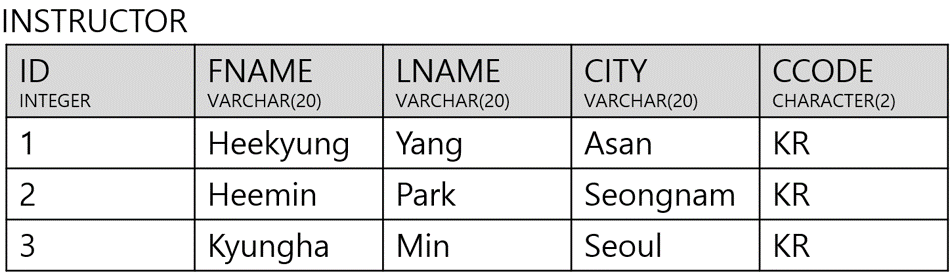


테이블을 생성하기 전에, 먼저 테이블이 이미 존재하는지 확인해야 한다. 데이터베이스에서 테이블을 삭제하려면 **DROP** 쿼리를 사용한다. 커서는 쿼리를 실행하고 데이터베이스에서 레코드를 가져오는 데 도움을 주는 객체이다.

In [ ]:
# Drop the table if already exists.
# @@@@@ 이 자리에 코드를 작성하시오. @@@@@
cursor_obj.execute("DROP TABLE IF EXISTS INSTRUCTOR")


## 이 오류가 발생해도 걱정하지 말자:

만약 다음과 유사한 예외/오류가 발생하여 `INSTRUCTOR`가 정의되지 않은 이름이라고 표시된다면, 이는 `INSTRUCTOR` 테이블이 데이터베이스에 존재하지 않음을 의미한다. 이는 이전에 해당 테이블을 생성하지 않았을 경우에 발생할 수 있는 정상적인 상황이다.

<strong>Exception: \[IBM]\[CLI Driver]\[DB2/LINUXX8664] SQL0204N  "ABC12345.INSTRUCTOR" is an undefined name.  SQLSTATE=42704 SQLCODE=-204</strong>


In [ ]:
# Creating table
table = """ create table IF NOT EXISTS INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2));"""

cursor_obj.execute(table)

print("Table is Ready")

Table is Ready


## Task 3: 테이블에 데이터 삽입

이 단계에서는 테이블에 몇 개의 데이터 행을 삽입할 것이다.

이전에 생성한 INSTRUCTOR 테이블에는 3개의 데이터 행이 포함되어 있다. 다음은 테이블에 데이터를 삽입하는 예제 코드이다:

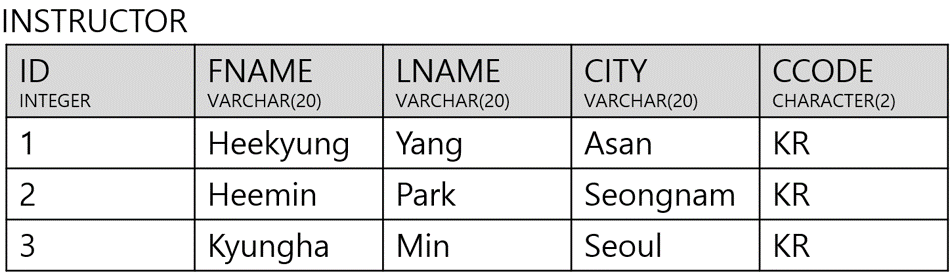

이 단계에서는 INSTRUCTOR 테이블에 강사의 데이터를 삽입한다. 예: Heekyung Yang


In [ ]:
cursor_obj.execute('''insert into INSTRUCTOR values (1, 'Heekyung', 'Yang', 'Asan', 'KR')''')

출력은 다음과 유사한 내용일 것이다: <strong>sqlite3.Cursor at 0x27a1a491260</strong>, 이는 MySQL 데이터베이스가 sqlite3.Cursor 객체를 0x27a1a491260 위치에 출력으로 생성했음을 의미한다. 단, 출력되는 숫자는 다를 수 있다.

이제 나머지 두 개의 데이터 행을 삽입하기 위해 하나의 쿼리를 사용해 보자

In [ ]:
cursor_obj.execute('''insert into INSTRUCTOR values (2, 'Heemin', 'Park', 'Seongnam', 'KR')''')
cursor_obj.execute('''insert into INSTRUCTOR values (3, 'Kyungha', 'Min', 'Seoul', 'KR')''')



## Task 4: 테이블에서 데이터 쿼리

이 단계에서는 INSTRUCTOR 테이블에 삽입된 데이터를 조회한다.


In [ ]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
    print(row_all)

All the data
(1, 'Heekyung', 'Yang', 'Asan', 'KR')
(2, 'Heemin', 'Park', 'Seongnam', 'KR')
(3, 'Kyungha', 'Min', 'Seoul', 'KR')


In [ ]:
## 테이블에서 몇몇 행을 가져오기
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
# 특정 개수의 행을 테이블에서 가져오려면 fetchmany(numberofrows) 메서드를 사용하고,
# 가져오고 싶은 행의 개수를 numberofrows에 지정한다.
output_many = cursor_obj.fetchmany(2)
for row_many in output_many:
    print(row_many)

All the data
(1, 'Heekyung', 'Yang', 'Asan', 'KR')
(2, 'Heemin', 'Park', 'Seongnam', 'KR')


In [ ]:
# 테이블에서 FNAME만 가져오기
# @@@@@ 이 자리에 코드를 작성하시오. @@@@@
statement='''select FNAME from instructor'''
cursor_obj.execute(statement)

print("All the data")
output_column = cursor_obj.fetchall()
for fetch in output_column:
    print(fetch)

All the data
('Heekyung',)
('Heemin',)
('Kyungha',)


<Strong>Bonus: 아래는 Heekyung Yang 강사의 CITY 정보를 Cheonan으로 업데이트하는 SQL 쿼리이다</strong>


In [ ]:
query_update='''update INSTRUCTOR set CITY='Cheonan' where FNAME="Heekyung"'''
cursor_obj.execute(query_update)

In [ ]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output1 = cursor_obj.fetchmany(2)
for row in output1:
    print(row)

All the data
(1, 'Heekyung', 'Yang', 'Cheonan', 'KR')
(2, 'Heemin', 'Park', 'Seongnam', 'KR')


## Task 5: Pandas로 데이터 가져오기

이 단계에서는 INSTRUCTOR 테이블의 내용을 Pandas 데이터프레임으로 가져올 것이다.


In [ ]:
import pandas as pd
#retrieve the query results into a pandas dataframe
df = pd.read_sql_query("select * from instructor;", conn)

#print the dataframe
df

,ID,FNAME,LNAME,CITY,CCODE
0,1,Heekyung,Yang,Cheonan,KR
1,2,Heemin,Park,Seongnam,KR
2,3,Kyungha,Min,Seoul,KR


In [ ]:
# pandas data frame 의 첫번째 행의 LNAME만 프린트하기
df.LNAME[0]

'Yang'

INSTRUCTOR 테이블의 데이터를 Pandas 데이터프레임으로 가져온 후, 일반적인 Pandas 작업을 수행할 수 있다.

예를 들어, shape 메서드를 사용하여 데이터프레임에 몇 개의 행과 열이 있는지 확인할 수 있다.

In [ ]:
df.shape

(3, 5)

## Task 6: Close the Connection

데이터베이스 연결을 종료하여 모든 리소스를 해제하는 것은 매우 중요하다. 사용하지 않는 연결이 리소스를 차지하는 것을 방지할 수 있기 때문이다다.


In [ ]:
# Close the connection
conn.close()

## 요약

이 튜토리얼에서는 SQLite3를 사용하여 Python 노트북에서 데이터베이스와 테이블을 생성했다. 그런 다음 테이블을 생성하고 몇 개의 데이터 행을 삽입했다. 이후 데이터를 쿼리하고, 해당 데이터를 pandas 데이터프레임으로 가져왔다.
